In [8]:
import networkx as nx
import matplotlib as plt
import random

Let's start by generate an Erdos-Renyi graph and plot it.

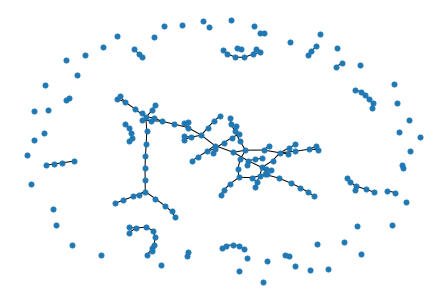

In [3]:
n = 200
k = 1.5
p = k/(n-1)
gnp = nx.fast_gnp_random_graph(n, p, seed=None, directed=False)
nx.draw(gnp,node_size=25)

Now we will extract the Giant Component from this graph.

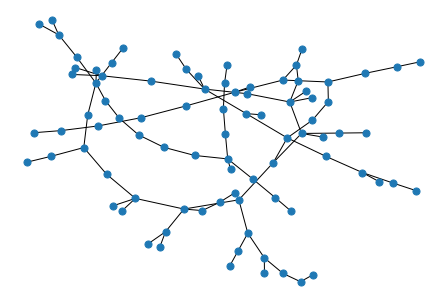

In [7]:
giant = list(max(nx.connected_components(gnp), key=len))
giant.sort(reverse= True)
gcc = gnp.subgraph(giant).copy()
nx.draw(gcc,node_size = 50)

Now let's select a random node from the giant component.

In [9]:
groundZero = random.choice(giant)
print(groundZero)

93


Now we can find all nodes that are 2 steps away from our target node.

In [11]:
dist = dict(nx.single_source_shortest_path_length(gcc,groundZero))

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

keys = getKeysByValue(dist,2)
print(keys)

[90, 199]


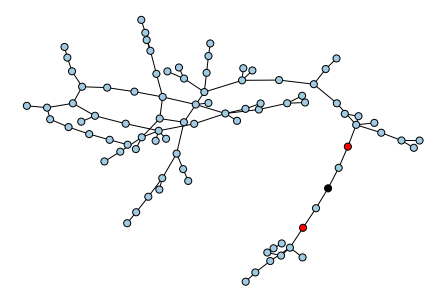

In [18]:
color_map = []
for node in gcc:
    if node == groundZero:
        color_map.append('#000000')
    elif node in keys: 
        color_map.append('#ff0000')
    else:
        color_map.append('#A0CBE2')
nx.draw(gcc, node_color=color_map, node_size=50, edgecolors="black")
#plt.figure(figsize=(20, 20))
